In [1]:
import pandas as pd, matplotlib.pyplot, scipy.stats

In [2]:
fu = pd.read_csv("HospitalAdmissionsData.csv")
fu

,ID,AdmissionLengthDays,Death_1,Admission_Type,Insurance_Type,EnglishLanguage_1,Religion_Type,Married_1,Race,Dx
0,42862,4.277778,0,elective,private,1,episcopalian,1,white,mitral stenosis\mitral valve replacement /sda
1,5967,26.122917,0,elective,private,0,catholic,1,white,duodenal mass/sda
2,50952,7.028472,1,emergency,medicare,1,catholic,0,asian - japanese,? serotonin syndrome
3,17138,34.187500,0,elective,medicare,1,catholic,1,white,abdominal aortic aneurysm/sda
4,27703,6.165972,0,elective,government,0,protestant quaker,0,black/african american,absence/sda
...,...,...,...,...,...,...,...,...,...,...
58858,42349,12.177083,0,elective,medicare,1,catholic,1,white,zenker's diverticulum/sda
58859,57461,10.613889,0,elective,medicare,1,catholic,0,white,zenker's diverticulum/sda
58860,11800,1.095139,0,emergency,private,0,unobtainable,0,white,zone 2 neck injury
58861,54574,2.925000,0,emergency,medicare,1,not specified,0,black/african american,zoster vs. meningitis


In [3]:
#column headers
fu.columns

Index(['ID', 'AdmissionLengthDays', 'Death_1', 'Admission_Type',
       'Insurance_Type', 'EnglishLanguage_1', 'Religion_Type', 'Married_1',
       'Race', 'Dx'],
      dtype='object')

In [4]:
#features
#int: 4
#float: 1
fu.dtypes

ID                       int64
AdmissionLengthDays    float64
Death_1                  int64
Admission_Type          object
Insurance_Type          object
EnglishLanguage_1        int64
Religion_Type           object
Married_1                int64
Race                    object
Dx                      object
dtype: object

In [5]:
#Features that are objects
#Admission Type, Insurance Type, Religion Type, Race, Dx

In [6]:
#Possible values for insurance type
#elective, emergency, urgent, newborn
fu["Admission_Type"].unique()

array(['elective', 'emergency', 'urgent', 'newborn'], dtype=object)

In [7]:
fu["AdmissionLengthDays"].describe()

count    58863.000000
mean        10.138978
std         12.465611
min         -0.945139
25%          3.743056
50%          6.465972
75%         11.798264
max        294.660417
Name: AdmissionLengthDays, dtype: float64

In [8]:
#most common admission type: emergency
#most common insurance type: medicare
#most common religion type: catholic 
#most common race: white
#most common diagnosis: newborn
for col in fu.columns:
    print(fu[col].describe())

count    58863.000000
mean     29508.211984
std      17026.189024
min          1.000000
25%      14762.500000
50%      29523.000000
75%      44254.500000
max      58976.000000
Name: ID, dtype: float64
count    58863.000000
mean        10.138978
std         12.465611
min         -0.945139
25%          3.743056
50%          6.465972
75%         11.798264
max        294.660417
Name: AdmissionLengthDays, dtype: float64
count    58863.000000
mean         0.099417
std          0.299224
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Death_1, dtype: float64
count         58863
unique            4
top       emergency
freq          41987
Name: Admission_Type, dtype: object
count        58863
unique           5
top       medicare
freq         28157
Name: Insurance_Type, dtype: object
count    58863.000000
mean         0.571072
std          0.494927
min          0.000000
25%          0.000000
50%          1.000000
75%          1.

Text(0.5, 1.0, ' Frequencey of Admission Length ')

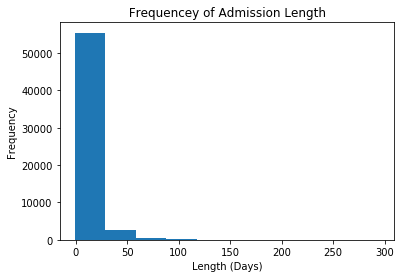

In [9]:
ax =fu["AdmissionLengthDays"].plot.hist(bins=10)
ax.set_xlabel("Length (Days)")
ax.set_title(" Frequencey of Admission Length ")


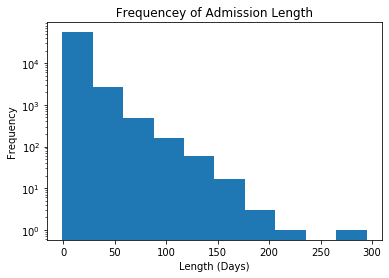

In [10]:
ax =fu["AdmissionLengthDays"].plot.hist(bins=10)
ax.set_xlabel("Length (Days)")
ax.set_title(" Frequencey of Admission Length ")
ax.set_yscale('log')
#data is compressed into a smaller range

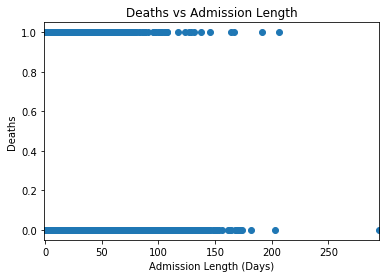

In [11]:
ax =fu.plot(x="AdmissionLengthDays", y="Death_1", style='o')
ax.set_title("Deaths vs Admission Length")
ax.set_xlabel("Admission Length (Days)")
ax.set_ylabel("Deaths")
ax.legend().remove()

In [12]:
fu.groupby("Death_1")["AdmissionLengthDays"].mean()

Death_1
0    10.140012
1    10.129606
Name: AdmissionLengthDays, dtype: float64

In [13]:
# fu.groupby("Death_1")["Insurance_Type"].describe()
fu.groupby("Insurance_Type")["Death_1"].describe()

,count,mean,std,min,25%,50%,75%,max
Insurance_Type,,,,,,,,
government,1781.0,0.050533,0.219104,0.0,0.0,0.0,0.0,1.0
medicaid,5781.0,0.065906,0.248138,0.0,0.0,0.0,0.0,1.0
medicare,28157.0,0.138651,0.345588,0.0,0.0,0.0,0.0,1.0
private,22534.0,0.061330,0.239939,0.0,0.0,0.0,0.0,1.0
self pay,610.0,0.155738,0.362904,0.0,0.0,0.0,0.0,1.0


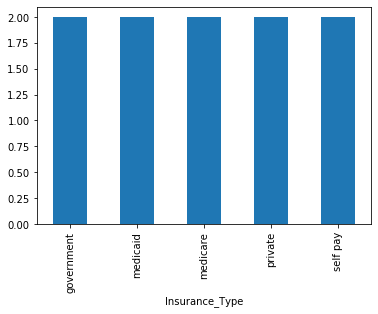

In [15]:
# ax = fu.plot()
# ax.set_index("Insurance_Type")
fu.groupby("Insurance_Type")["Death_1"].nunique().plot(kind="bar")